Script para processar dados grib2. 

Use o ambiente *grib* no Conda

Autor: mjt on 24-sep-2023

In [12]:
import xarray as xr
import matplotlib.pyplot as plt
import ecmwflibs
import cfgrib


In [27]:
# example of file that is available at LFAGHG

ds = xr.load_dataset("2021_07.grib2", engine="cfgrib")

In [28]:
ds

<xarray.Dataset>
Dimensions:     (time: 31, latitude: 924, longitude: 1001)
Coordinates:
  * time        (time) datetime64[ns] 2021-07-01T12:00:00 ... 2021-07-31T12:0...
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 -60.05 -59.95 -59.85 ... 32.05 32.15 32.25
  * longitude   (longitude) float64 239.9 240.0 240.1 ... 339.8 339.9 339.9
    valid_time  (time) datetime64[ns] 2021-07-01T12:00:00 ... 2021-07-31T12:0...
Data variables:
    prec        (time, latitude, longitude) float32 0.0 3.875 2.875 ... 0.0 0.0
    prmsl       (time, latitude, longitude) float32 nan nan nan ... nan nan nan
Attributes:
    GRIB_edition:            2
    GRIB_centre:             consensus
    GRIB_centreDescription:  Consensus
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Consensus
    history:                 2023-09-24T11:42 GRIB to CDM+CF via cfgrib-0.9.1...

Este grib é um tensor (dataframe) em que cada índice é um dia. Ele pode ser acessado com o valor da variável e plotado dia a dia. 

Os dados diários podem ser extraídos da mesma forma

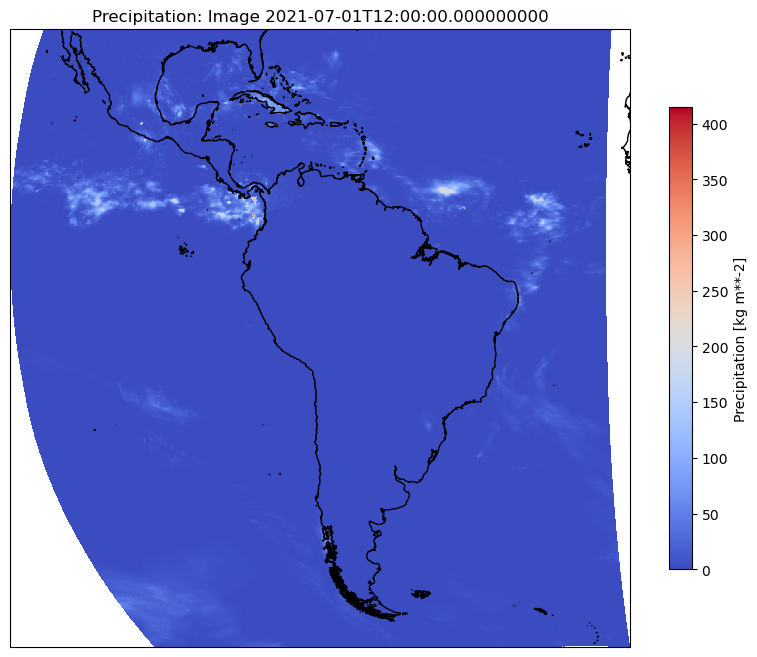

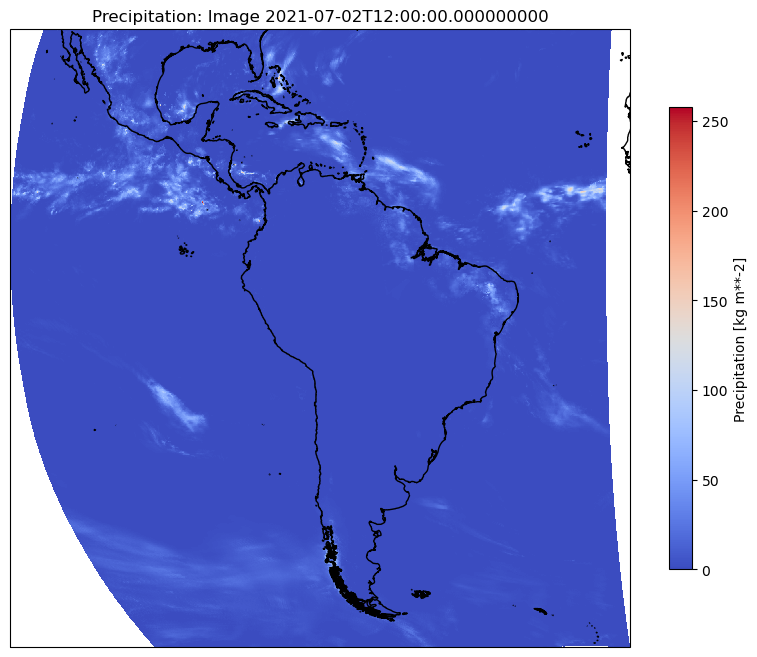

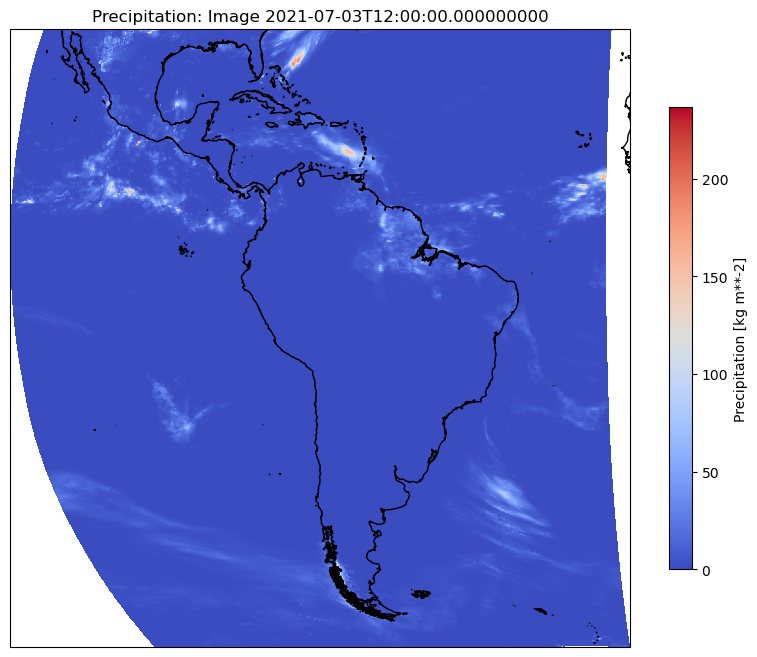

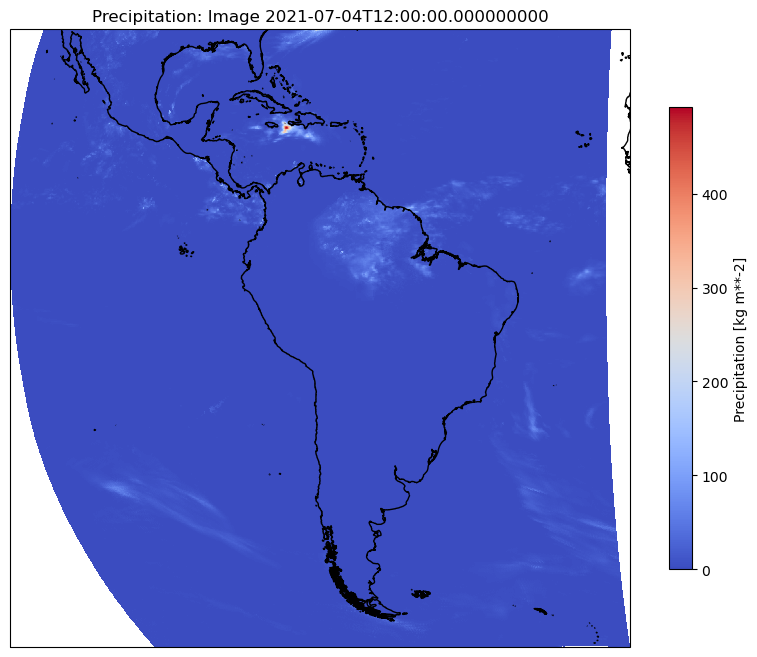

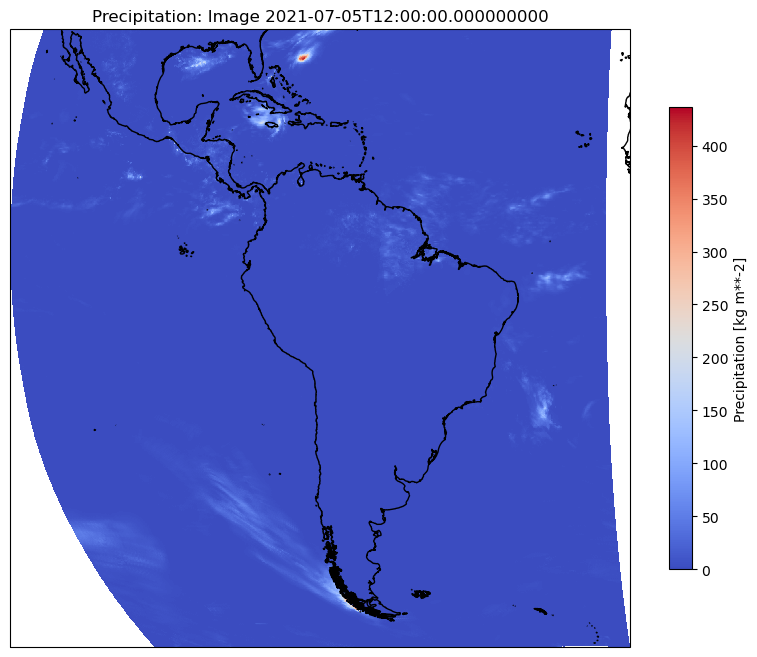

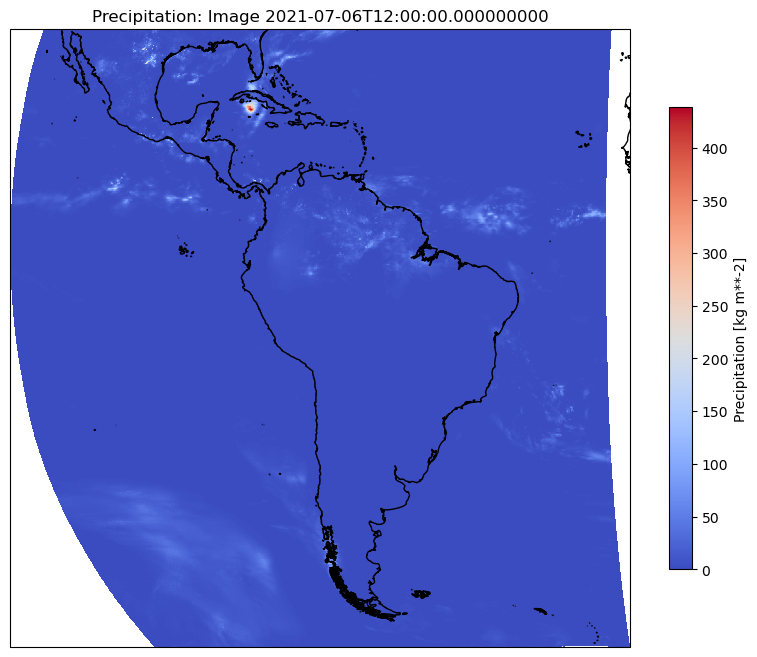

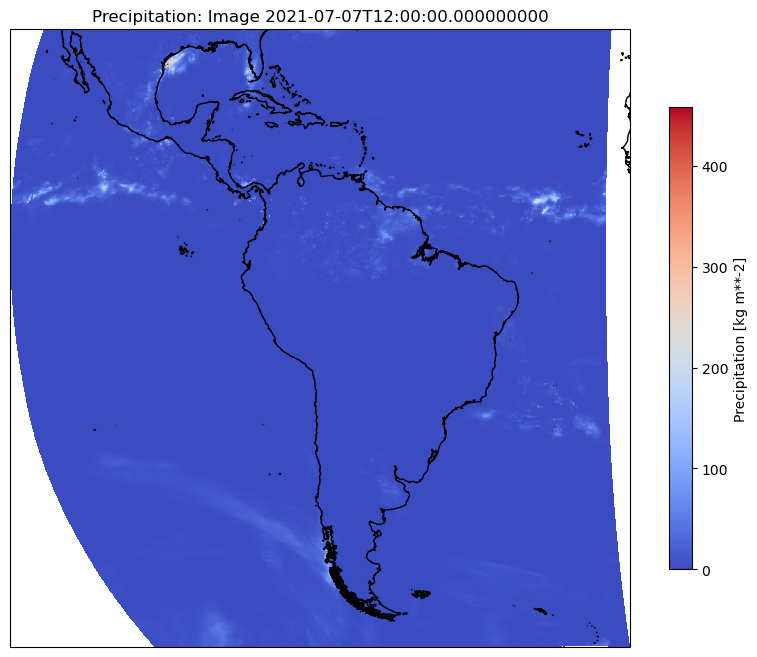

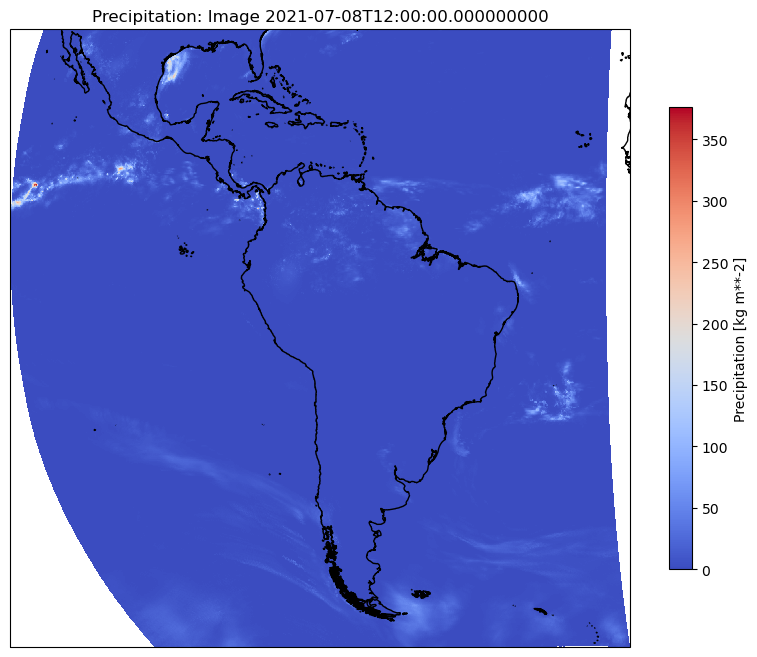

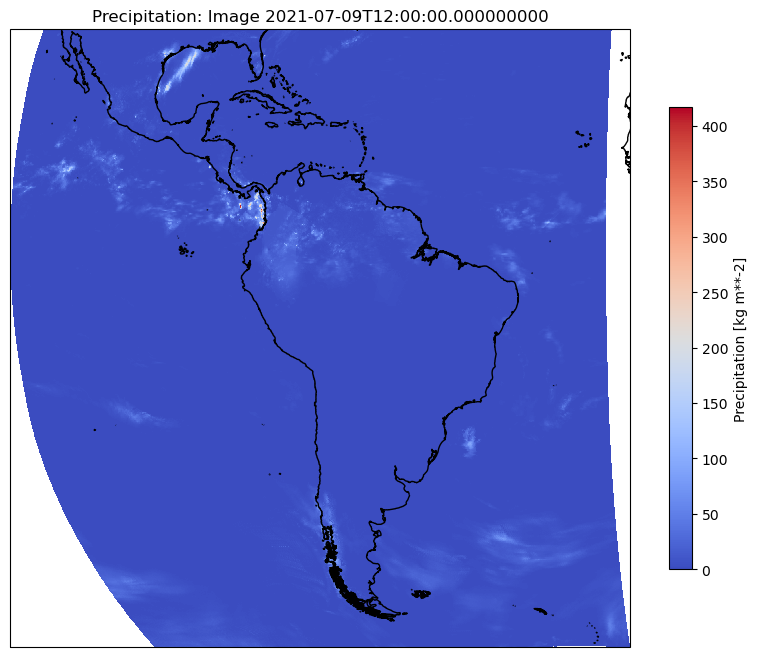

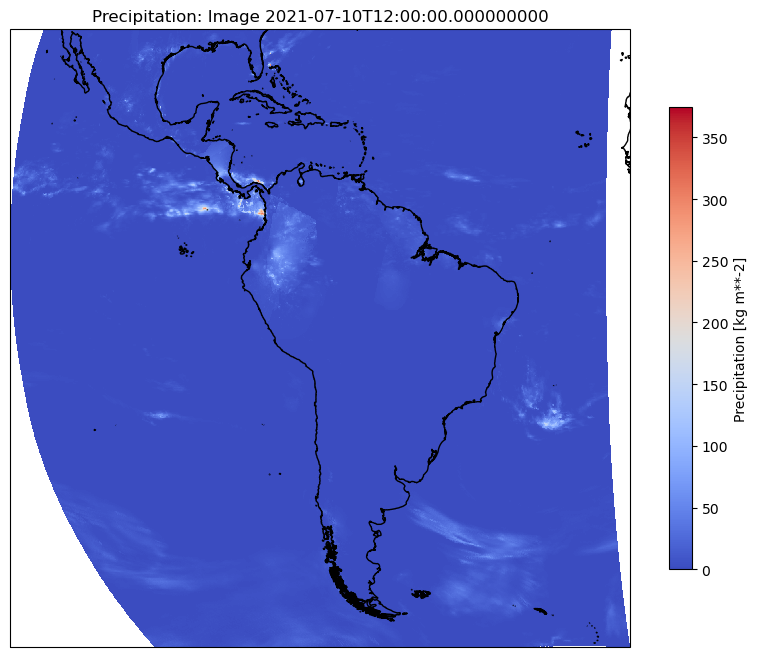

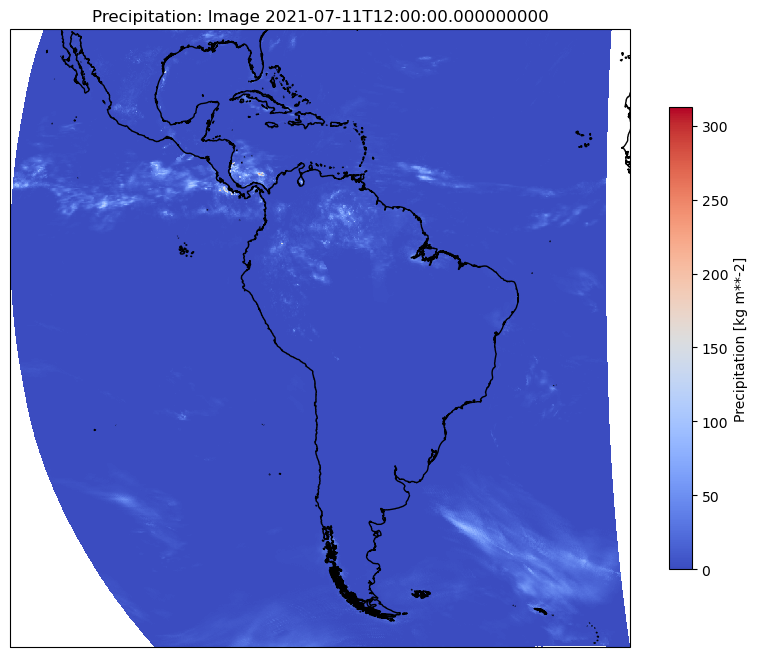

In [29]:
# Criar um mapa usando Matplotlib
# ds.prec[10].plot(cmap=plt.cm.coolwarm)

import cartopy.crs as ccrs


for i in range(0,11):

    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection=ccrs.Robinson())
    ax.coastlines(resolution="10m")
    plot = ds.prec[i].plot(
        cmap=plt.cm.coolwarm, transform=ccrs.PlateCarree(), cbar_kwargs={"shrink": 0.6}
    )
    plt.title(f"Precipitation: Image {ds.prec[i].time.values}")

    plt.show()
